In [3]:
import modules.vae_nn
import modules.savefolders
import resources.sinusoidal
import numpy as np
# Tensorflow
import tensorflow as tf

# Matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Data Generation Sinusoidal
Creates sinusoidal data points for training. 
**To do: Add better description**

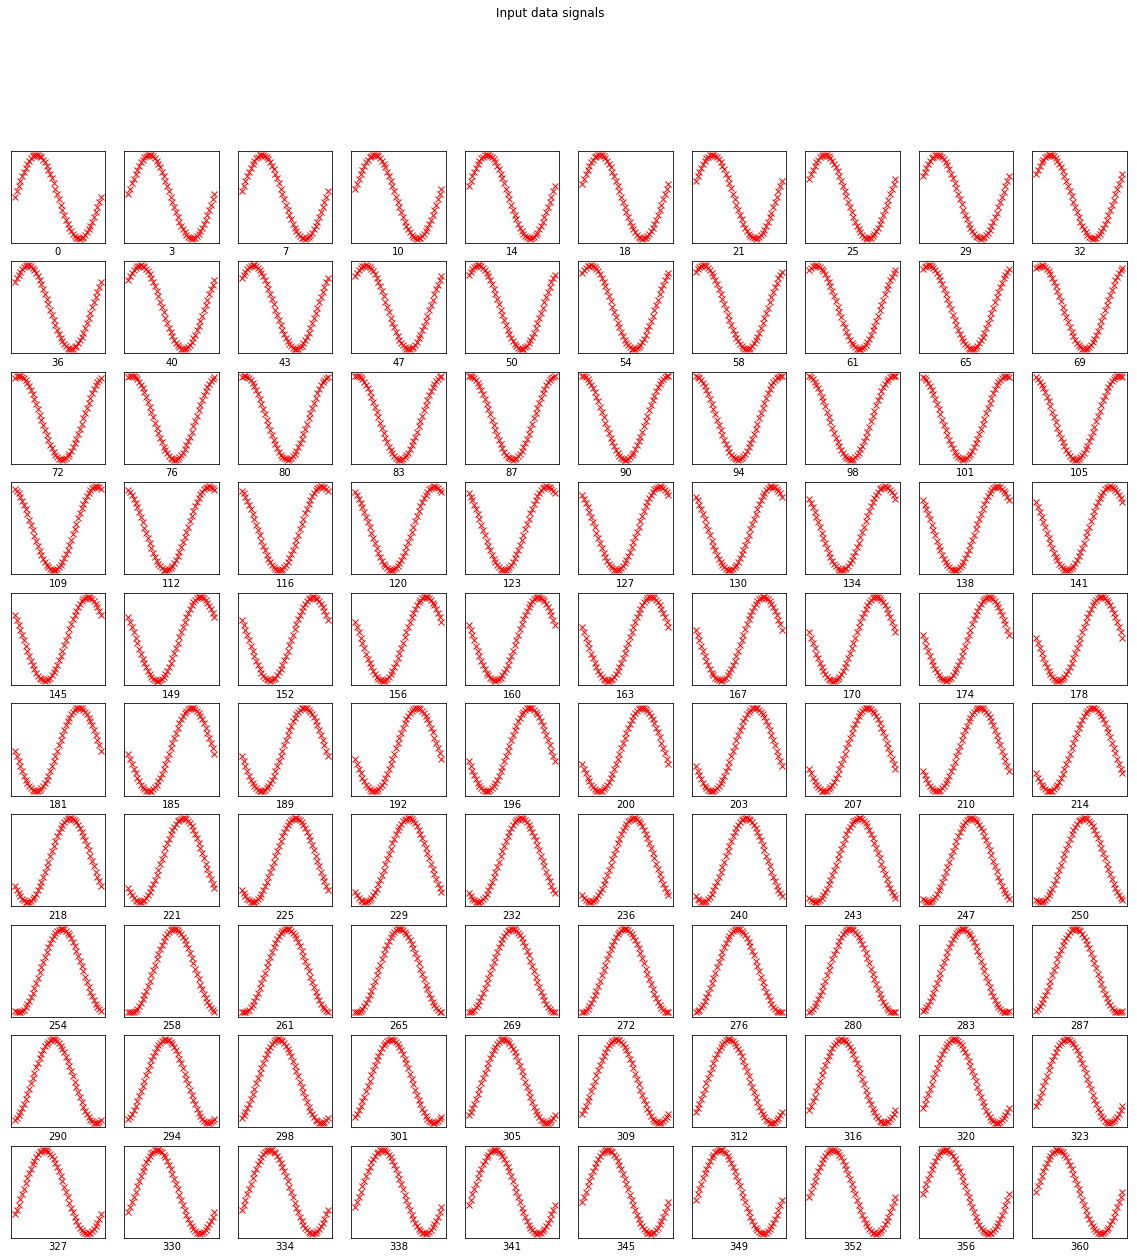

In [2]:
n_Phi = 100 # Number of data points
n_T = 50 # Dimension of sinusoidal data
omega = 2*np.pi # Angular frequency of signals
phase_range, time_range, signals = resources.sinusoidal.sinusoid_data_generation_1D(n_Phi, n_T, omega)

# PLOT THE DATA TO VISUALIZE IT ONLY FOR n_Phi = 100
fig, ax = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for num_row, row in enumerate(ax):
    for num_col, col in enumerate(row):
        col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))],'rx')
        col.set_xticks([])
        col.set_yticks([])
        col.set_xlabel(str(int(360*phase_range[np.ravel_multi_index((num_row,num_col),(10,10))]/(2*np.pi))))
        col.grid()
plt.suptitle('Input data signals')
plt.show()


## Saving Folders
Uses the class SaveFolders which creates a root folder with three subfolders in target_folder.  Whenever a vae is trained, the weights and tensorboard logs are saved for that training. 
- **models**: this folder saves the weights for the tensors of the experiment.
- **tensorboard**: where the necessary logs for visualizing in tensorboard are stored.
- **images**: still unused but in the future I can add something to create GIF's.

The VAE weights and tensorboard logs are saved with the experiment_name, extra_comments and timestamp.

Use method get_logdir_tensorboard() to extract the address of tensorboard logs for training.
Use method get_weight_file() to extract the address of weight logs for training.

To run tensorboard in terminal:
tensorboard --logdir=%log_dir_tensorboard

In [16]:
experiment_name = 'HKencoding' # Code for the experiment
extra_comments ='HeatKernel-10' # Extra comments of the experiment 
target_folder = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models"
folders = modules.savefolders.SaveFolders(target_folder, experiment_name, extra_comments)
log_dir_tensorboard = folders.get_logdir_tensorboard()
weights_folder =folders.get_weight_file()

Tensorboard address to copy paste:

C:\Users\LUISPR~1\DOCUME~1\Master\TUE\FINALP~1\TENSOR~1\models\HKENCO~1\TENSOR~1


## VAE Class

In [17]:
# Instantiate the VAE class
vae_parameters = {'input_dim': 50,
                 'latent_dim':1,
                 'learning_rate':0.0001,
                 'mode' : {'encoder': 'HeatKernel', 
                          'log_t': -10.0,
                          'N': 1000,
                          'projection':True}}
vae = modules.vae_nn.vae_nn(**vae_parameters)

[<tf.Variable 'decoder_HeatKernel/h_dec_HeatKernel/kernel:0' shape=(2, 16) dtype=float32_ref>, <tf.Variable 'decoder_HeatKernel/h_dec_HeatKernel/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder_HeatKernel/h_dec2_HeatKernel/kernel:0' shape=(16, 16) dtype=float32_ref>, <tf.Variable 'decoder_HeatKernel/h_dec2_HeatKernel/bias:0' shape=(16,) dtype=float32_ref>, <tf.Variable 'decoder_HeatKernel/x_r_HeatKernel/kernel:0' shape=(16, 50) dtype=float32_ref>, <tf.Variable 'decoder_HeatKernel/x_r_HeatKernel/bias:0' shape=(50,) dtype=float32_ref>]
Heat kernel chosen as encoder


In [18]:
# Train the VAE
vae_training_parameters = {'train_data': signals,
               'epochs': 2*10000,
               'log_dir_tensorboard': log_dir_tensorboard,
               'weights_folder': weights_folder,
                'batch_size':100}

vae.train_vae(**vae_training_parameters)

Initializing parameters
Epoch 0 | Loss: 2.99E-01 | MSE: 2.62E-01 | KL: 3.73E-02
Epoch 1 | Loss: 2.99E-01 | MSE: 2.62E-01 | KL: 3.73E-02
Epoch 2 | Loss: 2.99E-01 | MSE: 2.62E-01 | KL: 3.73E-02
Epoch 3 | Loss: 2.99E-01 | MSE: 2.61E-01 | KL: 3.73E-02
Epoch 4 | Loss: 2.98E-01 | MSE: 2.61E-01 | KL: 3.73E-02
Epoch 5 | Loss: 2.98E-01 | MSE: 2.61E-01 | KL: 3.73E-02
Epoch 6 | Loss: 2.98E-01 | MSE: 2.61E-01 | KL: 3.73E-02
Epoch 7 | Loss: 2.98E-01 | MSE: 2.60E-01 | KL: 3.73E-02
Epoch 8 | Loss: 2.98E-01 | MSE: 2.60E-01 | KL: 3.73E-02
Epoch 9 | Loss: 2.97E-01 | MSE: 2.60E-01 | KL: 3.73E-02
Epoch 10 | Loss: 2.97E-01 | MSE: 2.60E-01 | KL: 3.73E-02
Epoch 11 | Loss: 2.97E-01 | MSE: 2.60E-01 | KL: 3.73E-02
Epoch 12 | Loss: 2.97E-01 | MSE: 2.59E-01 | KL: 3.73E-02
Epoch 13 | Loss: 2.97E-01 | MSE: 2.59E-01 | KL: 3.73E-02
Epoch 14 | Loss: 2.96E-01 | MSE: 2.59E-01 | KL: 3.73E-02
Epoch 15 | Loss: 2.96E-01 | MSE: 2.59E-01 | KL: 3.73E-02
Epoch 16 | Loss: 2.96E-01 | MSE: 2.58E-01 | KL: 3.73E-02
Epoch 17 | Loss: 

UnknownError: Failed to rename: C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models\HKencoding\weights\checkpoint.tmpeb3c2dce3dc74cffab96033dca4c295f to: C:\Users\Luis Pérez\Documents\Master\TUE\Final Project\TensorFlow Models\models\HKencoding\weights\checkpoint : Access is denied.
; Input/output error

In [19]:
prediction = vae.encode(signals, weights_folder)

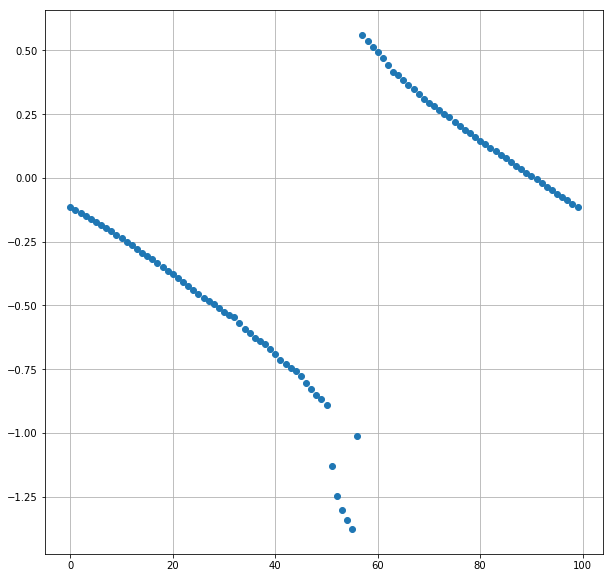

In [20]:
plt.figure(figsize = (10,10))
plt.plot(range(len(signals)), prediction, 'o')
plt.grid()
plt.show()

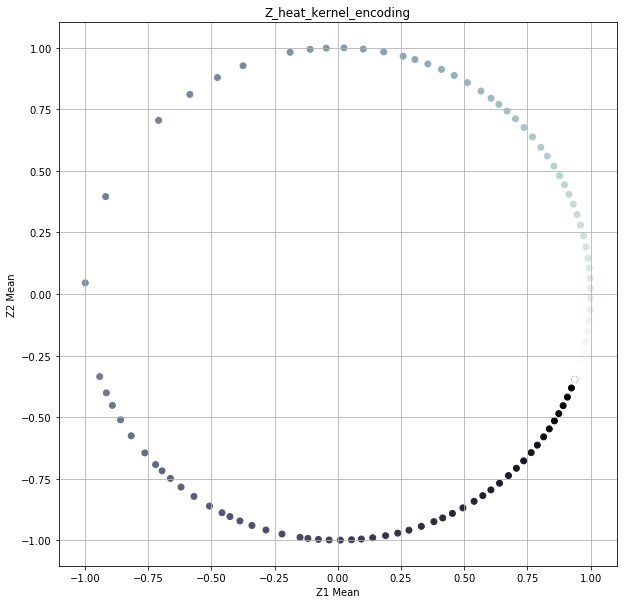

In [21]:
plt.figure(figsize=(10,10))
if vae_parameters['mode']['projection']:
    plt.scatter(np.cos(np.pi*prediction), np.sin(np.pi*prediction), c = np.arange(len(prediction)), cmap = cm.bone)
else:
    plt.scatter(phase_range,prediction)
plt.xlabel('Z1 Mean')
plt.ylabel('Z2 Mean')
plt.title('Z_heat_kernel_encoding')
plt.grid()
plt.savefig('Z_human_encoding_original.png')
plt.show()


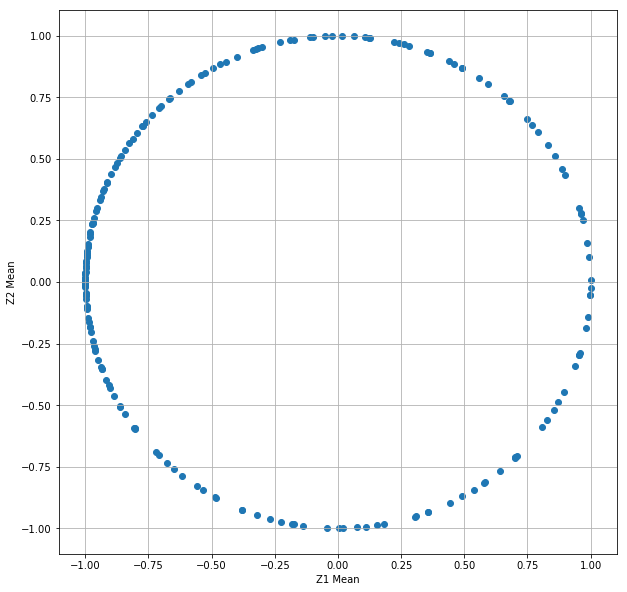

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(np.cos(np.pi*prediction),np.sin(np.pi*prediction))
plt.xlabel('Z1 Mean')
plt.ylabel('Z2 Mean')
plt.grid()
plt.show()


Plot the reconstruction of the signals

In [11]:
autoencoded = vae.autoencode(signals, weights_folder)

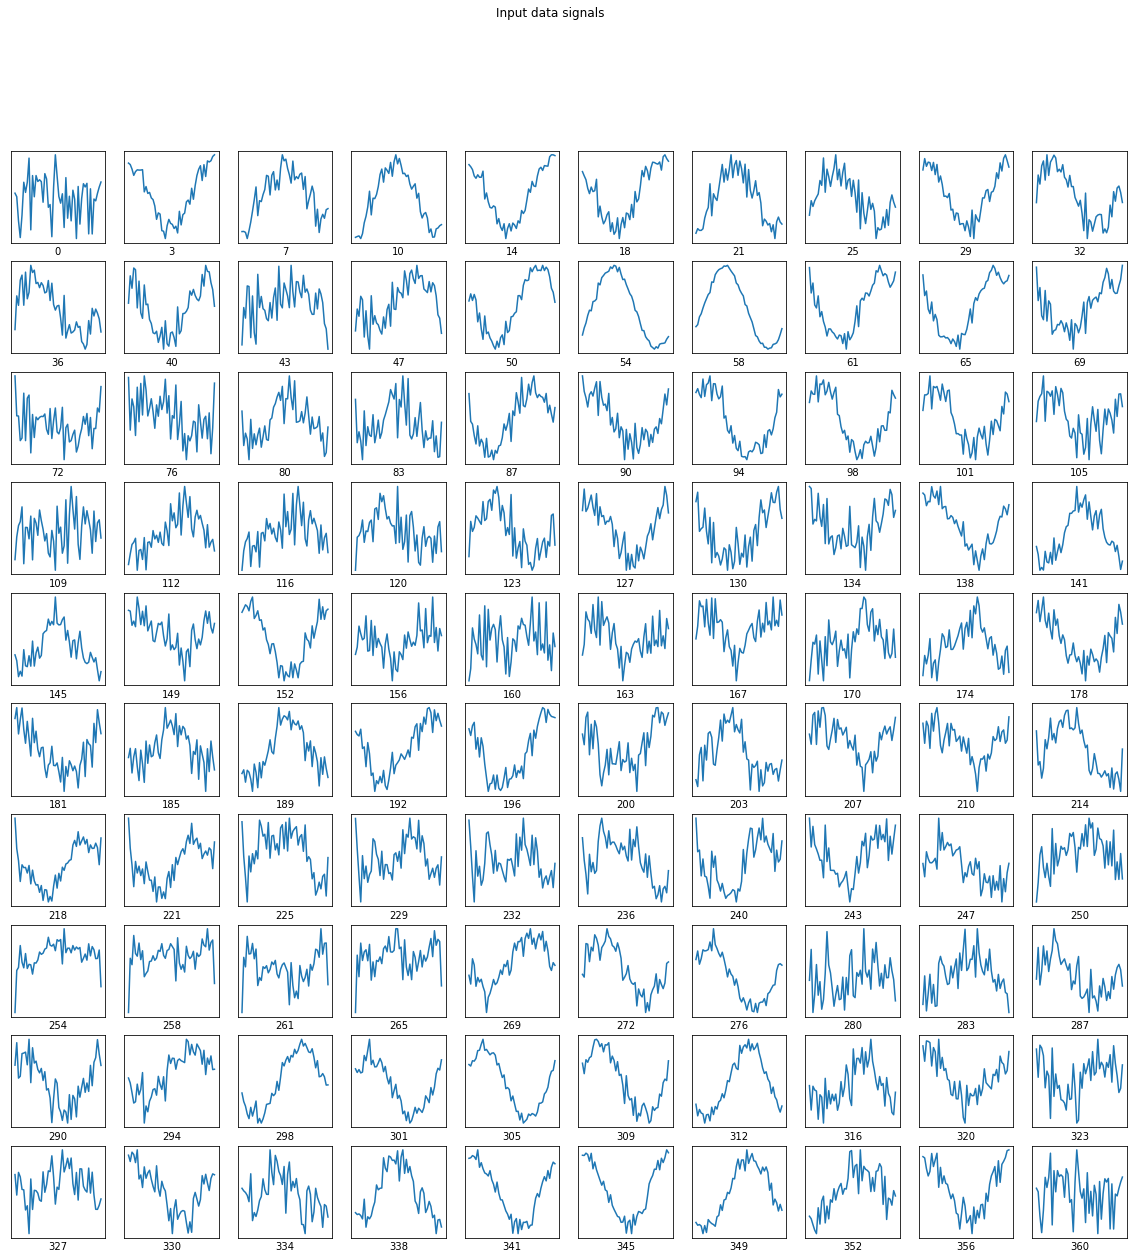

In [12]:
fig, ax = plt.subplots(10,10)
fig.set_figheight(20)
fig.set_figwidth(20)
for num_row, row in enumerate(ax):
    for num_col, col in enumerate(row):
#         col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))],'rx')
#         col.plot(time_range, autoencoded[np.ravel_multi_index((num_row,num_col),(10,10))],'bx')
        col.plot(time_range, signals[np.ravel_multi_index((num_row,num_col),(10,10))]-autoencoded[np.ravel_multi_index((num_row,num_col),(10,10))])
        col.set_xticks([])
        col.set_yticks([])
        col.set_xlabel(str(int(360*phase_range[np.ravel_multi_index((num_row,num_col),(10,10))]/(2*np.pi))))
        col.grid()
plt.suptitle('Input data signals')
plt.show()

**To do:**
- Use Dataset class from tensorboard to define the data in order to incorporate both shuffle and bath size.
- Fix the 


**Interesting notes**
- To get results with similar MSE to the Normal encoder VAE we need to add an extra hidden layer. It needs more parameters.

In [11]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 50], name="input")
h = tf.layers.dense(x, units = int(50//3), name = 'h_')
output = tf.layers.dense(h, name = 'output')

TypeError: dense() missing 1 required positional argument: 'units'